# Vehicle Detection

In this project, your goal is to write a software pipeline to identify vehicles in a video from a front-facing camera on a car. A video sample:

In [7]:
from IPython.display import HTML

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('./project_video.mp4'))

### Required packages

In [1]:
# Opencv http://docs.opencv.org/3.0-beta/modules/refman.html
import cv2
print("Opencv version: {}".format(cv2.__version__))

# Glob - Unix style pathname pattern expansion 
# https://docs.python.org/2/library/glob.html
import glob

# Numpy http://www.numpy.org/
import numpy as np
print("Numpy version: {}".format(np.__version__))

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Opencv version: 3.2.0
Numpy version: 1.13.3


## Data Exploration

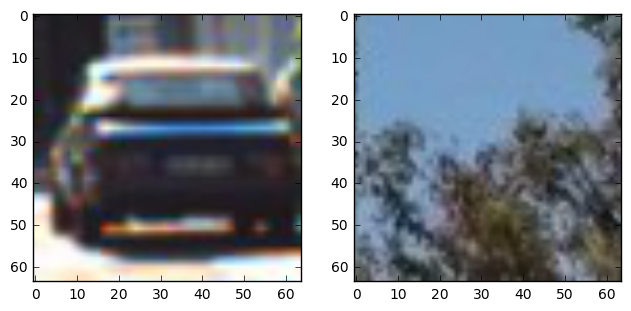

In [27]:
# Read a color image
img_car = image_utils.read_image("utils/vehicles_smallset/cars1/1.jpeg", image_color = 1)
img_not_car = image_utils.read_image("utils/non-vehicles_smallset/notcars1/extra01.jpeg", image_color = 1)

image_plotting.plot_images(images=[img_car, img_not_car])

## Draw Bounding Boxes

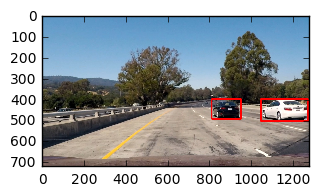

In [14]:
from utils import image_utils
from utils import image_plotting

# Read a color image
img = image_utils.read_image("test_images/test1.jpg", image_color = 1)

bboxes = [((810,400),(950,495)),((1045,400),(1270,505))]
new_image = image_plotting.draw_boxes(img, bboxes=bboxes, color=(255,0,0), thick=5)

image_plotting.plot_images(images=[new_image])

## Explore Color Spaces

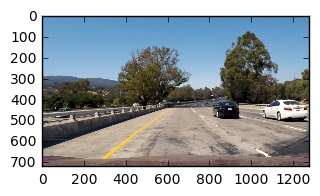

In [23]:
# Read a color image
img = image_utils.read_image("test_images/test1.jpg", image_color = 1)
    
image_plotting.plot_images([img])
    
# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)


### HSV

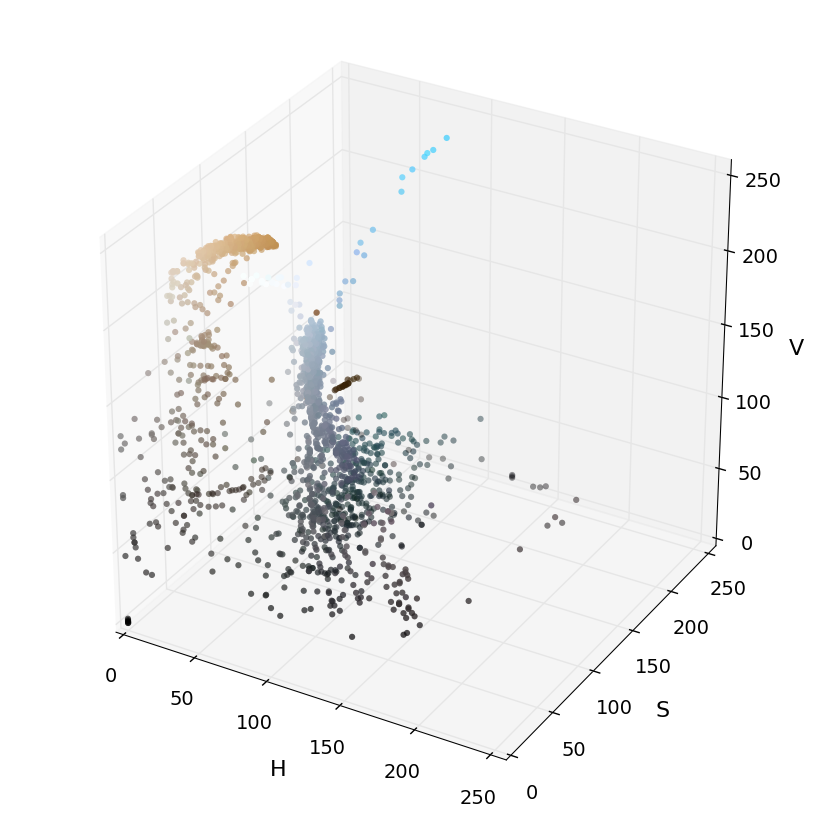

In [21]:
# Convert subsampled image to desired color space(s)
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)

# Plot and show
image_plotting.plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

### RGB

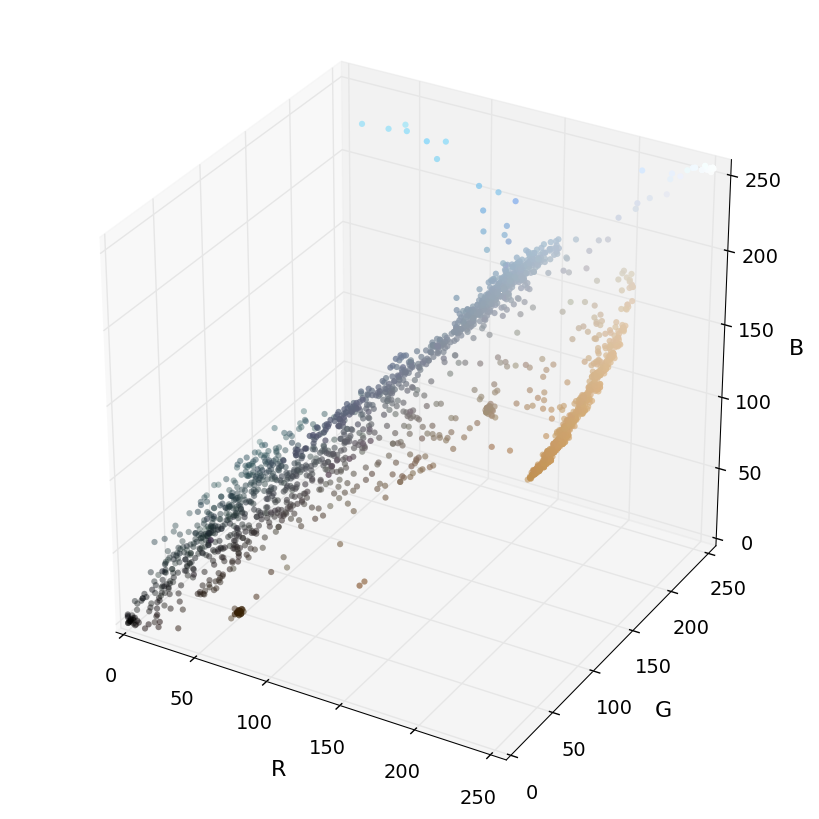

In [17]:
# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)

# Plot and show
image_plotting.plot3d(img_small_RGB, img_small_rgb, axis_labels=list("RGB"))
plt.show()

### Luv

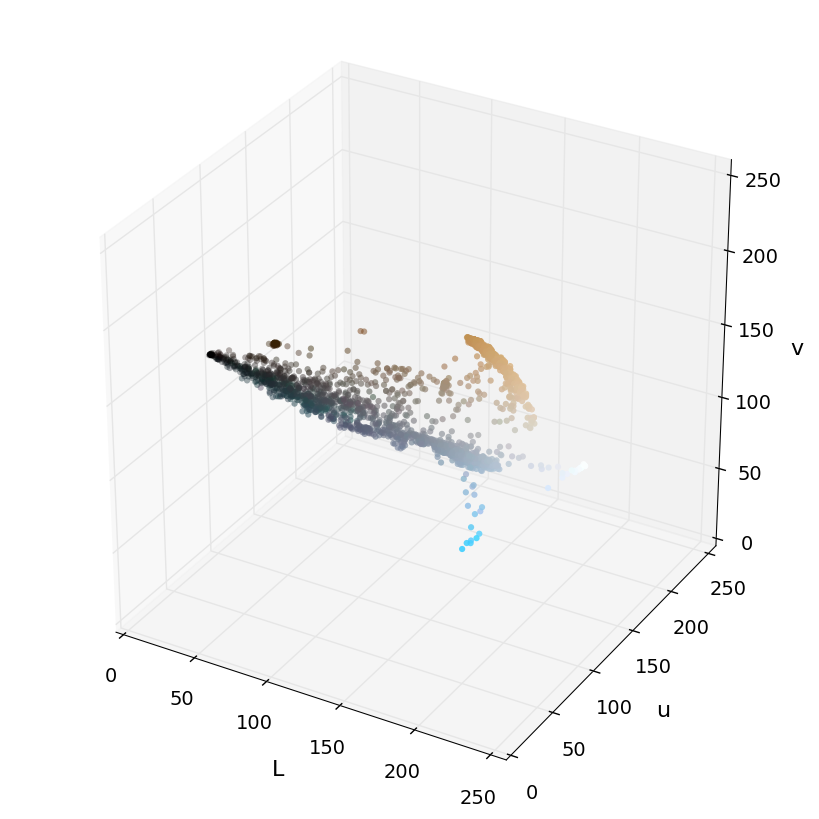

In [22]:
# Convert subsampled image to desired color space(s)
img_small_Luv = cv2.cvtColor(img_small, cv2.COLOR_BGR2Luv)

image_plotting.plot3d(img_small_Luv, img_small_rgb, axis_labels=list("Luv"))
plt.show()

## Spatial Binning of Color

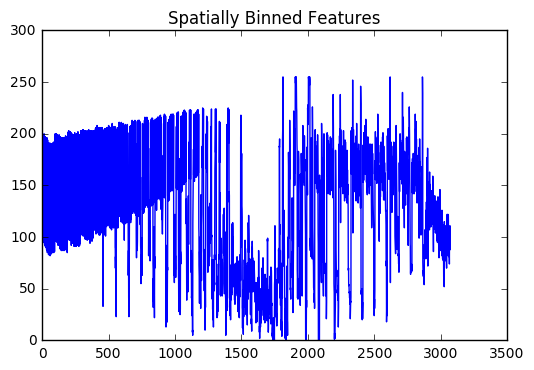

In [7]:
from utils import image_processing

feature_vec = image_processing.bin_spatial(img, color_space='RGB', size=(32, 32))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')

## Histogram of Oriented Gradients

In [ ]:
pix_per_cell = 8
cell_per_block = 2
orient = 9

features, hog_image = image_processing.get_hog_features(images[index][:,:,2], visualise=True, feature_vector=False)
image_plotting.plot_images([images[index], images[index][:,:,2], hog_image], color_map='gray')